## Tasmanian Dolerites
### Model 1 - Minimum number of sill segment:

For this, consider at what stratigraphic level the sill are propagating, and the propagation direction (~NW). 

    > If there is a step parallel to the propagation direction --> two segments
    > If there is a step perpendicular to the propagation direction --> same segment stepping up
        > If after the step, there are outcrops of lower segment --> sill framentation
    
    > No steps down

Sill segments REWRITE!:
- sill_a1 : roof, steps from Puo/Puc to Rqp at in faults pi_fault_2 and pi_fault_4.
- sill_a2 : roof, steps from Puc to Pum (?, only floor points in Puc after the fault) in pi_fault_5
- sill_a3 : floor, steps from Pln (?, only roof points in X before the fault) to Pua at fault pi_fault_8, then from Pua to Pch at fault pi_fault_6
- sill_a4 : roof, steps from Puo 


In [1]:
from datetime import datetime
datetime.now().isoformat(timespec='seconds')   

'2022-06-22T21:21:27'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loop library
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer 

# geometrical conceptual models
from LoopStructural.modelling.intrusions import ellipse_function, parallelepiped_function

In [3]:
lower_extent = [511530, 5238858, -1000]
upper_extent = [541353, 5267079, 2000]

In [4]:
def elevation_from_z_inteprolation(xy):
    from scipy.interpolate import NearestNDInterpolator
    dtm = pd.read_csv('C:/Users/falv0002/Documents/Repositories/LoopIntrusions/CaseStudy1_TassieDolerites/DEM/DEM_Data.csv')
    x = dtm.loc[:,'X'].to_numpy()
    y = dtm.loc[:,'Y'].to_numpy()
    z = dtm.loc[:,'Z'].to_numpy()
    dtm_bounds = [np.min(x),np.min(y),np.max(x),np.max(y)]


    dtm_interpolator = NearestNDInterpolator((x,y),z)
    interpolated_dtm =np.zeros(xy.shape[0])
    interpolated_dtm[:] = np.nan
    inside = np.logical_and(xy[:,0] > dtm_bounds[0], xy[:,0] < dtm_bounds[2])
    inside = np.logical_and(inside, xy[:,1] > dtm_bounds[1])
    inside = np.logical_and(inside, xy[:,1] < dtm_bounds[3])
    interpolated_dtm = dtm_interpolator(xy[:])
    
    return interpolated_dtm

In [5]:
# create_dtm_with_rasterio2(np.array([[531333,5244719]]))

In [6]:
model_data = pd.read_csv('Model_Data.csv')
# model_data.head()

In [7]:
# topo = pd.read_csv('C:/Users/falv0002/Documents/Repositories/LoopIntrusions/CaseStudy1_TassieDolerites/DEM/DEM_Data.csv')
# # topo = topo.sample(frac = 0.005)
# topo['val'] = 0
# topo['feature_name'] = 'topo'
# topo.reset_index(inplace=True)
# topo.loc[0,['gx','gy','gz']] = [0,0,1]

# model_data = pd.concat([model_data,topo])
# # model_data['feature_name'].unique()

In [8]:
# Create Geological Model

model = GeologicalModel(lower_extent,upper_extent)
model.nsteps = [60,60,100]
model.data = model_data
# model.dtm = elevation_from_z_inteprolation

In [9]:
# topography = model.create_and_add_foliation('topo')

In [10]:
post_intrusion_fault_1 = model.create_and_add_fault('fault_1',
                                                    displacement=150,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                    #buffer=0.3
                                                   )


post_intrusion_fault_2 = model.create_and_add_fault('fault_2',
                                                    displacement=300,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                    #buffer=0.3
                                                   )

post_intrusion_fault_3a = model.create_and_add_fault('fault_3a',
                                                    displacement=250,
                                                    #nelements=2000,
                                                    #steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_3b = model.create_and_add_fault('fault_3b',
                                                    displacement=700,
                                                    nelements=2000,
                                                    #steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_3c = model.create_and_add_fault('fault_3c',
                                                    displacement=400,
                                                    nelements=2000,
                                                    #steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_3d = model.create_and_add_fault('fault_3d',
                                                    displacement=250,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_3e = model.create_and_add_fault('fault_3e',
                                                    displacement=220,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )
post_intrusion_fault_3f = model.create_and_add_fault('fault_3f',
                                                    displacement=130,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_4a = model.create_and_add_fault('fault_4a',
                                                    displacement=200,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )

post_intrusion_fault_4b = model.create_and_add_fault('fault_4b',
                                                    displacement=250,
                                                    nelements=2000,
                                                    steps=1, interpolatortype='PLI', 
                                                     #buffer=0.3
                                                    )


In [11]:
post_intrusion_faults = [post_intrusion_fault_1, post_intrusion_fault_2, 
                         post_intrusion_fault_3a, post_intrusion_fault_3b, post_intrusion_fault_3c,
                         post_intrusion_fault_3d, post_intrusion_fault_3e, post_intrusion_fault_3f,
                         post_intrusion_fault_4a, post_intrusion_fault_4b]

In [12]:
conformable_feature = model.create_and_add_foliation('Tasmanian Basin', 
                                                     nelements = 3000, 
                                                     solver = 'lu', 
                                                     interpolatortype = 'FDI')

# stratigraphic column

stratigraphic_column = {}
stratigraphic_column['Tasmanian Basin'] = {}
stratigraphic_column['Tasmanian Basin']['Plo'] = {'min':-500,'max':-100,'id':0}
stratigraphic_column['Tasmanian Basin']['Pln'] = {'min':-100,'max':0,'id':1}
stratigraphic_column['Tasmanian Basin']['Pff, Puc/Puo, Pud'] = {'min':0,'max':100,'id':2}
stratigraphic_column['Tasmanian Basin']['Pum, Pur'] = {'min':100,'max':200,'id':3}
stratigraphic_column['Tasmanian Basin']['Pua'] = {'min':200,'max':300,'id':4}
stratigraphic_column['Tasmanian Basin']['Pch'] = {'min':300,'max':400,'id':5}
stratigraphic_column['Tasmanian Basin']['Rcq/Rqp'] = {'min':400,'max':500,'id':6}
stratigraphic_column['Tasmanian Basin']['Rqm'] = {'min':500,'max':600,'id':7}
stratigraphic_column['Tasmanian Basin']['Rv'] = {'min':600,'max':800,'id':8}
model.set_stratigraphic_column(stratigraphic_column)

# disable faults to build intrusions 
conformable_feature.faults_enabled = False

In [13]:
# create pre-intrusion faults
displacement = 0

#pre_intrusion_fault_2
pre_intrusion_fault_1 = model.create_and_add_fault('pi_fault_1', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_5
pre_intrusion_fault_2 = model.create_and_add_fault('pi_fault_2', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_9
pre_intrusion_fault_4 = model.create_and_add_fault('pi_fault_4', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_10
pre_intrusion_fault_5 = model.create_and_add_fault('pi_fault_5', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_11
pre_intrusion_fault_6 = model.create_and_add_fault('pi_fault_6', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_12
pre_intrusion_fault_7 = model.create_and_add_fault('pi_fault_7', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

#pre_intrusion_fault_13
pre_intrusion_fault_8 = model.create_and_add_fault('pi_fault_8', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

pre_intrusion_fault_9 = model.create_and_add_fault('pi_fault_9', 
                                                   displacement=displacement, 
                                                   nelements=2000, steps=1, 
                                                   interpolatortype='PLI', buffer=0.3)

pre_intrusion_fault_10 = model.create_and_add_fault('pi_fault_10', 
                                                    displacement=displacement, 
                                                    nelements=2000, steps=1, 
                                                    interpolatortype='PLI', buffer=0.3)

In [14]:
# # Visualisation of pre-intrusion units and faults

# # Prepare data for visualization

# sill_data = model.data[(model.data['feature_name']=='Sill_a3')].loc[:,['X','Y','Z']].to_numpy()
# sill_floor_data = model.data[(model.data['feature_name']=='Sill_a3') & (model.data['intrusion_contact_type']=='floor')].copy().loc[:,['X','Y','Z']].to_numpy()
# sill_roof_data = model.data[(model.data['feature_name']=='Sill_a3') & (model.data['intrusion_contact_type']=='roof')].copy().loc[:,['X','Y','Z']].to_numpy()
# sill_lat_data = model.data[(model.data['feature_name']=='Sill_a3') & (model.data['intrusion_side']== True)].copy().loc[:,['X','Y','Z']].to_numpy()

# model.dtm = elevation_from_z_inteprolation
# conformable_feature.faults_enabled = True


# viewer1 = LavaVuModelViewer(model, background='white')
# # viewer1.nsteps = [25,25,50]

# # viewer1.add_isosurface(topography['feature'], isovalue = 0, colour = 'black',  name = 'topo')

# viewer1.add_isosurface(pre_intrusion_fault_1, isovalue = 0, colour = 'red')
# viewer1.add_isosurface(pre_intrusion_fault_2, isovalue = 0, colour = 'red')
# viewer1.add_isosurface(pre_intrusion_fault_4, isovalue = 0, colour = 'red')
# viewer1.add_isosurface(pre_intrusion_fault_5, isovalue = 0, colour = 'red')
# viewer1.add_isosurface(pre_intrusion_fault_6, isovalue = 0, colour = 'red')
# viewer1.add_isosurface(pre_intrusion_fault_7, isovalue = 0, colour = 'red')
# viewer1.add_isosurface(pre_intrusion_fault_8, isovalue = 0, colour = 'red')
# viewer1.add_isosurface(pre_intrusion_fault_9, isovalue = 0, colour = 'red')
# viewer1.add_isosurface(pre_intrusion_fault_10, isovalue = 0, colour = 'red')

# viewer1.add_isosurface(conformable_feature['feature'], isovalue = -100, colour = 'darkblue',  name = 'Plo - Pln')
# viewer1.add_isosurface(conformable_feature['feature'], isovalue = 0, colour = 'mediumblue',  name = 'Pln - Pff')
# viewer1.add_isosurface(conformable_feature['feature'], isovalue = 100, colour = 'royalblue', name = 'Puo/Pud - Pum')
# viewer1.add_isosurface(conformable_feature['feature'], isovalue = 200, colour = 'turquoise',  name = 'Pur - Pua')
# viewer1.add_isosurface(conformable_feature['feature'], isovalue = 300, colour = 'lightgreen',  name = 'Pua - Rcq/Pch')
# viewer1.add_isosurface(conformable_feature['feature'], isovalue = 400, colour = 'darkgreen',  name = 'Pch - Rqpc')
# viewer1.add_isosurface(conformable_feature['feature'], isovalue = 500, colour = 'green',  name = 'Rqp/Rcq-Rqm')
# viewer1.add_isosurface(conformable_feature['feature'], isovalue = 600, colour = 'yellowgreen',  name = 'Rqm-Rv')
# viewer1.add_data(conformable_feature['feature'])

# viewer1.add_isosurface(post_intrusion_fault_1, isovalue = 0, colour = 'blue')
# viewer1.add_isosurface(post_intrusion_fault_2, isovalue = 0, colour = 'blue')
# viewer1.add_isosurface(post_intrusion_fault_3a, isovalue = 0, colour = 'blue')
# viewer1.add_isosurface(post_intrusion_fault_3b, isovalue = 0, colour = 'blue')
# viewer1.add_isosurface(post_intrusion_fault_3c, isovalue = 0, colour = 'blue')
# viewer1.add_isosurface(post_intrusion_fault_3d, isovalue = 0, colour = 'blue')
# viewer1.add_isosurface(post_intrusion_fault_3e, isovalue = 0, colour = 'blue')
# viewer1.add_isosurface(post_intrusion_fault_3f, isovalue = 0, colour = 'blue')
# viewer1.add_isosurface(post_intrusion_fault_4a, isovalue = 0, colour = 'blue')
# viewer1.add_isosurface(post_intrusion_fault_4b, isovalue = 0, colour = 'blue')



# # viewer1.add_points(model.rescale(sill_data, inplace = False), name = 'sill data', pointsize = 5)
# # viewer1.add_points(model.rescale(sill_roof_data, inplace = False), name = 'sill roof data', pointsize = 10, colour = 'red')
# # viewer1.add_points(model.rescale(sill_floor_data, inplace = False), name = 'sill floor data', pointsize = 10, colour = 'purple')
# # viewer1.add_points(model.rescale(sill_lat_data, inplace = False), name = 'sill lateral data', pointsize = 10, colour = 'green')

# viewer1.ymin=0
# viewer1.ymax=1
# viewer1.xmin=0
# viewer1.xmax=1
# viewer1.interactive()

In [15]:
# conceptual geometrical models

def ellipse_function(lateral_contact_data=pd.DataFrame(), model = True, minP=None, maxP=None, minS=None, maxS=None):
    
    if lateral_contact_data.empty:
        return model, minP, maxP, minS, maxS

    else:
        
        if minP == None:
            minP = lateral_contact_data["coord1"].min()
        if maxP == None:
            maxP = lateral_contact_data["coord1"].max()
        if minS == None:
            minS = lateral_contact_data["coord2"].abs().min()
        if maxS == None:
            maxS = lateral_contact_data["coord2"].max()

        a = (maxP - minP) / 2
        b = (maxS - minS) / 2

        po = minP + (maxP - minP) / 2

        p_locations = lateral_contact_data.loc[:, "coord1"].copy().to_numpy()

        s = np.zeros([len(p_locations), 2])

        s[np.logical_and(p_locations > minP, p_locations < maxP), 0] = b * np.sqrt(
            1
            - np.power(
                (p_locations[np.logical_and(p_locations > minP, p_locations < maxP)] - po)
                / a,
                2,
            )
        )
        s[np.logical_and(p_locations > minP, p_locations < maxP), 1] = -b * np.sqrt(
            1
            - np.power(
                (p_locations[np.logical_and(p_locations > minP, p_locations < maxP)] - po)
                / a,
                2,
            )
        )

        return s

def piriformcurve_function(lateral_contact_data, model = True, minP=None, maxP=None, minS=None, maxS=None):

    if minP == None:
        minP = lateral_contact_data["coord1"].min()
    if maxP == None:
        maxP = lateral_contact_data["coord1"].max()
        
    # maxP = maxP + 1000
    # minP = minP - 1000
    a = (maxP - minP) / 2
    po = minP
    p_locations = lateral_contact_data.loc[:, "coord1"].copy().to_numpy()
    
    s = np.zeros([len(p_locations), 2])
    
    #min side
    b = abs(minS)
    s[:,1] =-(b/pow(a,2))*(
        np.sqrt(np.power(p_locations-po,3)*(2*a-(p_locations-po))))
    
    b = maxS
    s[:,0] =(b/pow(a,2))*(
        np.sqrt(np.power(p_locations-po,3)*(2*a-(p_locations-po))))
    

    s = np.nan_to_num(s)

    return s

def custom_function(lateral_contact_data, minP=None, maxP=None, minS=None, maxS=None):
    
    if minP == None:
        minP = lateral_contact_data["coord1"].min()
    if maxP == None:
        maxP = lateral_contact_data["coord1"].max()
        
    # maxP = maxP + 1000
    # minP = minP - 1000
    a = (maxP - minP) / 2
    
    p_locations = lateral_contact_data.loc[:, "coord1"].copy().to_numpy()
    
    s = np.zeros([len(p_locations), 2])
    
    #min side - ellipse
    b = abs(minS)
    po = minP + (maxP - minP) / 2
    s[np.logical_and(p_locations > minP, p_locations < maxP), 1] = -b * np.sqrt(
        1
        - np.power(
            (p_locations[np.logical_and(p_locations > minP, p_locations < maxP)] - po)
            / a,
            2,
        )
    )
    #max side - piriform curve
    b = maxS
    po = minP
    s[:,0] =(b/pow(a,2))*(
        np.sqrt(np.power(p_locations-po,3)*(2*a-(p_locations-po))))
    

    # s[:,0] = np.nan_to_num(s[:,0])

    return s


In [16]:
# create sill a1
intrusion_steps = {}
intrusion_steps['step1'] = {'structure' : pre_intrusion_fault_2, 
                            'unit_from' : 'Pff, Puc/Puo, Pud', 'series_from': conformable_feature, 
                            'unit_to' : 'Rqm','series_to': conformable_feature}
intrusion_steps['step2'] = {'structure' : pre_intrusion_fault_4, 
                            'unit_from' : 'Pff, Puc/Puo, Pud', 'series_from': conformable_feature, 
                            'unit_to' : 'Rqm','series_to': conformable_feature}
intrusion_steps['step3'] = {'structure' : pre_intrusion_fault_7, 
                            'unit_from' : 'Pff, Puc/Puo, Pud', 'series_from': conformable_feature, 
                            'unit_to' : 'Rqm','series_to': conformable_feature}


intrusion_network_parameters = {'type' : 'interpolated' , 'contact' :'roof', 
                                'intrusion_steps' : intrusion_steps,
                                'contact_anisotropies' : [conformable_feature],
                                'delta_c' : [0.5,0.5,0.5],
                                'delta_f' : [1,1,1]
                               }

thicknes_simulation_parameters = {'radius' :10000} # modify search radious for simulation of vertical extent
width_simulation_parameters =  {'radius' : 100000} 

Sill_a1 = model.create_and_add_intrusion('Sill_a1', intrusion_frame_name = 'Sill_a1_frame',
                                        intrusion_lateral_extent_model = ellipse_function,
                                        intrusion_vertical_extent_model = parallelepiped_function,
                                        intrusion_network_parameters = intrusion_network_parameters,
                                        #geometric_scaling_parameters = {'intrusion_type' : 'major_mafic_sills', 'intrusion_length' : 2e4},
                                        vertical_extent_sgs_parameters = thicknes_simulation_parameters,
                                        lateral_extent_sgs_parameters = width_simulation_parameters,
                                         faults = post_intrusion_faults
                                       )

In [17]:
# create sill a2
intrusion_steps = {}
intrusion_steps['step1'] = {'structure' : pre_intrusion_fault_5, 
                            'unit_from' : 'Pff, Puc/Puo, Pud', 'series_from': conformable_feature, 
                            'unit_to' : 'Pum, Pur','series_to': conformable_feature}
intrusion_steps['step2'] = {'structure' : pre_intrusion_fault_9, 
                            'unit_from' : 'Pln', 'series_from': conformable_feature, 
                            'unit_to' : 'Rv','series_to': conformable_feature}


intrusion_network_parameters = {'type' : 'interpolated' , 'contact' :'roof', 
                                'intrusion_steps' : intrusion_steps,
                                'contact_anisotropies' : [conformable_feature],
                                'delta_c' : [0.8,0.3],
                                'delta_f' : [1,1]
                               }

thicknes_simulation_parameters = {'radius' :10000} # modify search radious for simulation of vertical extent
width_simulation_parameters =  {'radius' : 10000} 

Sill_a2 = model.create_and_add_intrusion('Sill_a2', intrusion_frame_name = 'Sill_a2_frame',
                                        intrusion_lateral_extent_model = ellipse_function,
                                        intrusion_vertical_extent_model = parallelepiped_function,
                                        intrusion_network_parameters = intrusion_network_parameters,
                                        vertical_extent_sgs_parameters = thicknes_simulation_parameters,
                                        lateral_extent_sgs_parameters = width_simulation_parameters,
                                        faults = post_intrusion_faults,
                                        geometric_scaling_parameters = {'intrusion_type' : 'major_mafic_sills', 'intrusion_length' : 2e4}
                                         
                                         
                                       )

In [18]:
# model.stratigraphic_column

In [19]:
# create sill a3
intrusion_steps = {}
intrusion_steps['step1'] = {'structure' : pre_intrusion_fault_4, 
                            'unit_from' : 'Pum, Pur', 'series_from': conformable_feature, 
                            'unit_to' : 'Rcq/Rqp','series_to': conformable_feature}
intrusion_steps['step3'] = {'structure' : pre_intrusion_fault_7, 
                            'unit_from' : 'Pum, Pur', 'series_from': conformable_feature, 
                            'unit_to' : 'Rqm','series_to': conformable_feature}



intrusion_network_parameters = {'type' : 'interpolated' , 'contact' :'floor', 
                                'intrusion_steps' : intrusion_steps,
                                'contact_anisotropies' : [conformable_feature],
                                'delta_c' : [0.5, 0.5],
                                'delta_f' : [1,1]
                               }

thicknes_simulation_parameters = {'radius' :10000} # modify search radious for simulation of vertical extent
width_simulation_parameters =  {'radius' : 20000} 

Sill_a3 = model.create_and_add_intrusion('Sill_a3', intrusion_frame_name = 'Sill_a3_frame',
                                        intrusion_lateral_extent_model = ellipse_function,
                                        intrusion_vertical_extent_model = parallelepiped_function,
                                        intrusion_network_parameters = intrusion_network_parameters,
                                        geometric_scaling_parameters = {'intrusion_type' : 'major_mafic_sills', 'intrusion_length' : 5e4},
                                        vertical_extent_sgs_parameters = thicknes_simulation_parameters,
                                        lateral_extent_sgs_parameters = width_simulation_parameters,
                                        faults = post_intrusion_faults
                                       )

In [20]:
# create sill a4b
intrusion_steps = {}
intrusion_steps['step1'] = {'structure' : pre_intrusion_fault_9, 
                            'unit_from' : 'Pln', 'series_from': conformable_feature, 
                            'unit_to' : 'Rv','series_to': conformable_feature}



intrusion_network_parameters = {'type' : 'interpolated' , 'contact' :'roof', 
                                'intrusion_steps' : intrusion_steps,
                                'contact_anisotropies' : [conformable_feature],
                                'delta_c' : [0.3,1e-1,0.05],
                                'delta_f' : [1,1,1]
                               }


thicknes_simulation_parameters = {'radius' :10000} # modify search radious for simulation of vertical extent
width_simulation_parameters =  {'radius' : 10000} 

Sill_a4 = model.create_and_add_intrusion('Sill_a4b', intrusion_frame_name = 'Sill_a4b_frame',
                                        intrusion_lateral_extent_model = ellipse_function,
                                        intrusion_vertical_extent_model = parallelepiped_function,
                                        intrusion_network_parameters = intrusion_network_parameters,
                                        geometric_scaling_parameters = {'intrusion_type' : 'major_mafic_sills', 
                                                                        'intrusion_length' : 2e4
                                                                       },
                                        vertical_extent_sgs_parameters = thicknes_simulation_parameters,
                                        lateral_extent_sgs_parameters = width_simulation_parameters,
                                        faults = post_intrusion_faults
                                       )

In [21]:
# Sill = Sill_a4
# sill_frame = Sill.intrusion_frame

# # visualisation of intrusion frame

# viewer3 = LavaVuModelViewer(model, background='white')
# viewer3.nsteps = [25,25,50]
# # viewer3.add_isosurface(topography['feature'], isovalue = 0, colour = 'black',  name = 'topo')
# # viewer3.add_isosurface(post_intrusion_fault_3b, isovalue = 0, colour = 'purple')
# # viewer3.add_isosurface(post_intrusion_fault_3c, isovalue = 0, colour = 'purple')
# # viewer3.add_isosurface(post_intrusion_fault_3d, isovalue = 0, colour = 'purple')
# # viewer3.add_isosurface(post_intrusion_fault_3e, isovalue = 0, colour = 'purple')
# # viewer3.add_isosurface(conformable_feature['feature'], isovalue = -100, colour = 'darkblue',  name = 'Plo - Pln')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 0, colour = 'mediumblue',  name = 'Pln - Pff')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 100, colour = 'royalblue', name = 'Puo/Pud - Pum')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 200, colour = 'turquoise',  name = 'Pur - Pua')
# viewer3.add_isosurface(conformable_feature['feature'], isovalue = 300, colour = 'lightgreen',  name = 'Pua - Rcq/Pch')
# # viewer3.add_isosurface(conformable_feature['feature'], isovalue = 400, colour = 'darkgreen',  name = 'Pch - Rqpc')
# # viewer3.add_isosurface(conformable_feature['feature'], isovalue = 500, colour = 'green',  name = 'Rqp/Rcq-Rqm')
# # viewer3.add_isosurface(conformable_feature['feature'], isovalue = 600, colour = 'yellowgreen',  name = 'Rqm-Rv')

# viewer3.add_isosurface(post_intrusion_fault_3c, isovalue = 0, colour = 'purple')
# viewer3.add_isosurface(post_intrusion_fault_3d, isovalue = 0, colour = 'purple')
# viewer3.add_isosurface(post_intrusion_fault_3e, isovalue = 0, colour = 'purple')
# viewer3.add_isosurface(post_intrusion_fault_3f, isovalue = 0, colour = 'purple')
# viewer3.add_isosurface(pre_intrusion_fault_4, isovalue = 0, colour = 'orange')

# # viewer3.add_points(model.rescale(inet, inplace = False), name = 'inet', pointsize = 10)
# # viewer3.add_points(model.rescale(sill3_data, inplace = False), name = 'sill3_data', pointsize = 10)

# # add intrusion frame
# # viewer3.add_scalar_field(sill_frame[0])
# viewer3.add_isosurface(sill_frame[0], isovalue = 0, colour = 'red')
# viewer3.add_isosurface(sill_frame[1], isovalue = 0, colour = 'green')
# viewer3.add_isosurface(sill_frame[2], isovalue = 0, colour = 'blue')


# # viewer3.add_isosurface(conformable_feature['feature'], isovalue = -50)
# # viewer3.add_isosurface(conformable_feature['feature'], isovalue = 250)
# viewer3.add_data(sill_frame[0])

# viewer3.ymin = 0
# viewer3.ymax = 1
# viewer3.xmin = 0
# viewer3.xmax = 1

# viewer3.interactive()

In [22]:
# # visualization of indicator functions
# ifx_f = Sill.intrusion_frame.builder.get_indicator_function_points(ifx_type = 'faults')[1]
# inet = Sill.intrusion_frame.builder.intrusion_network_points[:,:3]

# viewer2 = LavaVuModelViewer(model, background='white')
# viewer2.add_isosurface(pre_intrusion_fault_7, isovalue = 0, colour = 'blue')

# viewer2.add_isosurface(conformable_feature['feature'], isovalue = 0, colour = 'lightblue')
# # viewer2.add_isosurface(conformable_feature['feature'], isovalue = 1, colour = 'lightgreen')
# # viewer2.add_isosurface(conformable_feature['feature'], isovalue = 2, colour = 'limegreen')
# # viewer2.add_isosurface(conformable_feature['feature'], isovalue = 3, colour = 'green')
# # viewer2.add_isosurface(conformable_feature['feature'], isovalue = 4, colour = 'darkgreen')

# # viewer2.add_points(model.rescale(ifx_c0[:,:3], inplace = False), name = 'ind fx contact0', pointsize = 5, colour = 'red')
# # viewer2.add_points(model.rescale(ifx_c1[:,:3], inplace = False), name = 'ind fx contact1', pointsize = 5, colour = 'green')
# viewer2.add_points(model.rescale(ifx_f[:,:3], inplace = False), name = 'ind fx flts', pointsize = 5, colour = 'blue')

# # viewer2.add_points(model.rescale(sill_data, inplace = False), name = 'sill data', pointsize = 5)


# viewer2.ymin = 0.01
# viewer2.ymax = 1
# viewer2.xmin = 0.01
# viewer2.xmax = 1

# viewer2.interactive()

In [23]:
# sill_frame = Sill_a1.intrusion_frame
# ifx_f = Sill_a1.intrusion_frame.builder.get_indicator_function_points(ifx_type = 'faults')[0]
# inet = Sill_a1.intrusion_frame.builder.intrusion_network_points[:,:3]

# # visualisation of intrusion frame

# viewer3 = LavaVuModelViewer(model, background='white')
# viewer3.add_isosurface(pre_intrusion_fault_5, isovalue = 0, colour = 'purple')
# viewer3.add_isosurface(pre_intrusion_fault_9, isovalue = 0, colour = 'purple')
# viewer3.add_isosurface(pre_intrusion_fault_10, isovalue = 0, colour = 'purple')

# viewer3.add_points(model.rescale(inet, inplace = False), name = 'inet', pointsize = 10)

# # add intrusion frame
# viewer3.add_scalar_field(sill_frame[0])
# viewer3.add_isosurface(sill_frame[0], isovalue = 0, colour = 'red')
# # viewer3.add_isosurface(sill_frame[0],  nslices = 6, colour = 'red')
# viewer3.add_isosurface(sill_frame[1], isovalue = 0, colour = 'green')
# viewer3.add_isosurface(sill_frame[2], isovalue = 0, colour = 'blue')
# # viewer3.add_isosurface(sill_frame[1], nslices = 6, colour = 'green')

# viewer3.add_data(sill_frame[0])
# viewer3.add_data(sill_frame[2])
# viewer3.add_points(model.rescale(sill_roof_data, inplace = False), name = 'sill roof data', pointsize = 5, colour = 'green')
# viewer3.add_points(model.rescale(sill_floor_data, inplace = False), name = 'sill floor data', pointsize = 5, colour = 'purple')

# viewer3.ymin = 0
# viewer3.ymax = 1
# viewer3.xmin = 0
# viewer3.xmax = 1

# viewer3.interactive()

c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:433: RuntimeWarning: invalid value encountered in true_divide
  vector /= norm[:, None]
c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:441: RuntimeWarning: divide by zero encountered in true_divide
  T /= norm[:, None, None]


-17126.395638997517 6612.830058034894
Not enought lateral data for simulation of side L>=0, Using roof/floor data to condition the conceptual model
Simulation of lateral side L>=0: No enought roof/floor data to condition the conceptual model, lateral contact equivalent to conceptual

 Data for SGSIM: Number of acceptable data     = 3
                 Number trimmed                = 0
                 Weighted Average              = 4431.6851
                 Weighted Variance             = 952785.3485
                 Weighted Transformed Average  = -0.0
                 Weighted Transformed Variance = 0.6239
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 60
   currently on node 120
   currently on node 180
   currently on node 240
   currently on node 300
   currently on node 360
   currently on node 420
   currently on node 480
   currently on node 540
Reassigning data to nodes

 Realization 0: number 

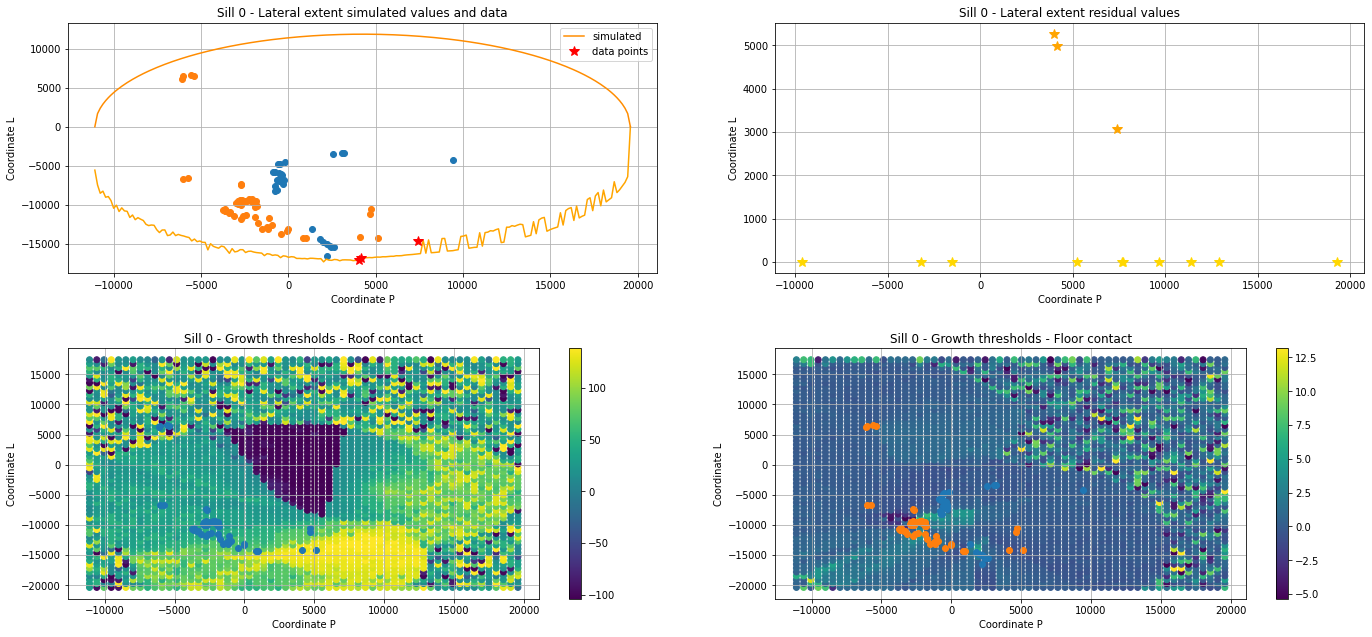

In [24]:
intrusion = Sill_a1
plt.subplot(221) # Lateral extent simulated values and data     
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'min_l_threshold'],"-",c='orange', markersize = 10)
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'max_l_threshold'],"-", label = 'simulated', c='darkorange', markersize = 10)
#plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_minl'],"-", c='green', markersize = 10)
#plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_maxl'],"-",  label = 'conceptual', c='green', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'coord2'],"*",  label = 'data points', c='red', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'coord2'],"*", c='red', markersize = 10)
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent simulated values and data')
plt.legend()
plt.grid(True)


plt.subplot(222) # Residual values  
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'l_residual'],"*",  label = 'sides1', c='orange', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'l_residual'],"*",  label = 'sides1', c='gold', markersize = 10)
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent residual values')
plt.grid(True)

plt.subplot(223) # Vertical extent     
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_maximum'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Roof contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplot(224)
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_minimum'])
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Floor contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3, top=2, wspace=0.2, hspace=0.3)
plt.show()

c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:433: RuntimeWarning: invalid value encountered in true_divide
  vector /= norm[:, None]
c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:441: RuntimeWarning: divide by zero encountered in true_divide
  T /= norm[:, None, None]


Building intrusion using geometric scaling parameters: estimated thicknes = 148 meters
-14330.12844582734 6613.31916730329
Not enought lateral data for simulation of side L<0, Using roof/floor data to condition the conceptual model
Not enought lateral data for simulation of side L>=0, Using roof/floor data to condition the conceptual model
Simulation of lateral side L>=0: No enought roof/floor data to condition the conceptual model, lateral contact equivalent to conceptual

 Data for SGSIM: Number of acceptable data     = 84
                 Number trimmed                = 0
                 Weighted Average              = 3368.4023
                 Weighted Variance             = 1645604.1137
                 Weighted Transformed Average  = -0.0
                 Weighted Transformed Variance = 0.9849
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 60
   currently on node 120
   currently on node 180
   c

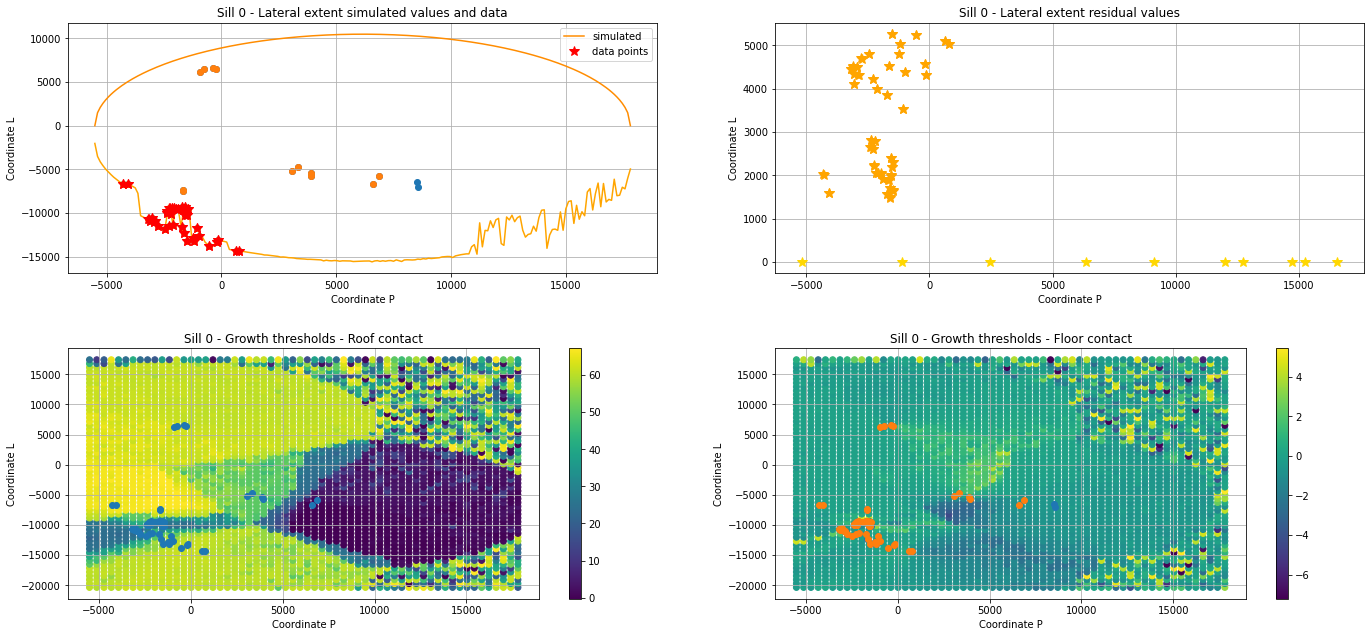

In [25]:
intrusion = Sill_a2
plt.subplot(221) # Lateral extent simulated values and data     
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'min_l_threshold'],"-",c='orange', markersize = 10)
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'max_l_threshold'],"-", label = 'simulated', c='darkorange', markersize = 10)
#plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_minl'],"-", c='green', markersize = 10)
#plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_maxl'],"-",  label = 'conceptual', c='green', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'coord2'],"*",  label = 'data points', c='red', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'coord2'],"*", c='red', markersize = 10)
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent simulated values and data')
plt.legend()
plt.grid(True)


plt.subplot(222) # Residual values  
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'l_residual'],"*",  label = 'sides1', c='orange', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'l_residual'],"*",  label = 'sides1', c='gold', markersize = 10)
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent residual values')
plt.grid(True)

plt.subplot(223) # Vertical extent     
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_maximum'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Roof contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplot(224)
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_minimum'])
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Floor contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3, top=2, wspace=0.2, hspace=0.3)
plt.show()

c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:433: RuntimeWarning: invalid value encountered in true_divide
  vector /= norm[:, None]
c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:441: RuntimeWarning: divide by zero encountered in true_divide
  T /= norm[:, None, None]


-14237.925803036 8577.330012739036
Not enought lateral data for simulation of side L<0, Using roof/floor data to condition the conceptual model
Not enought lateral data for simulation of side L>=0, Using roof/floor data to condition the conceptual model
Simulation of lateral side L>=0: No enought roof/floor data to condition the conceptual model, lateral contact equivalent to conceptual

 Data for SGSIM: Number of acceptable data     = 3
                 Number trimmed                = 0
                 Weighted Average              = 1978.163
                 Weighted Variance             = 1882344.2248
                 Weighted Transformed Average  = -0.0
                 Weighted Transformed Variance = 0.6239
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 60
   currently on node 120
   currently on node 180
   currently on node 240
   currently on node 300
   currently on node 360
   currently on nod

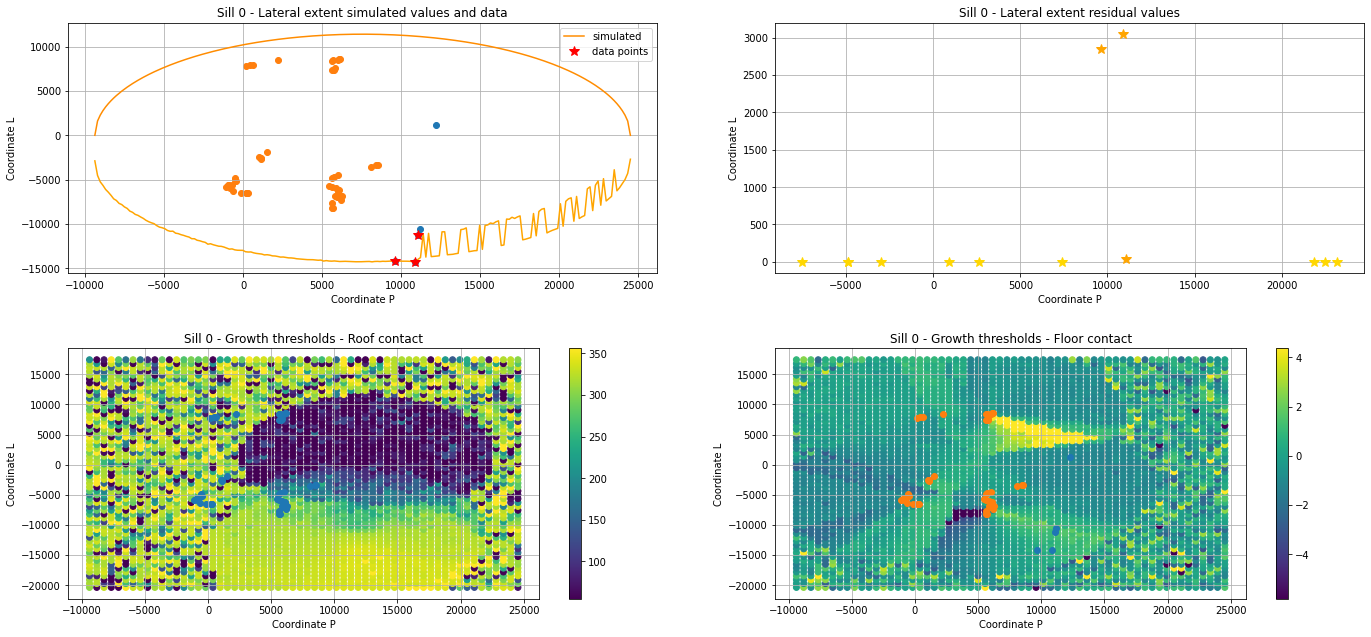

In [26]:
intrusion = Sill_a3
plt.subplot(221) # Lateral extent simulated values and data     
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'min_l_threshold'],"-",c='orange', markersize = 10)
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'max_l_threshold'],"-", label = 'simulated', c='darkorange', markersize = 10)
# plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_minl'],"-", c='green', markersize = 10)
# plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_maxl'],"-",  label = 'conceptual', c='green', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'coord2'],"*",  label = 'data points', c='red', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'coord2'],"*", c='red', markersize = 10)
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent simulated values and data')
plt.legend()
plt.grid(True)


plt.subplot(222) # Residual values  
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'l_residual'],"*",  label = 'sides1', c='orange', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'l_residual'],"*",  label = 'sides1', c='gold', markersize = 10)
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent residual values')
plt.grid(True)

plt.subplot(223) # Vertical extent     
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_maximum'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Roof contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplot(224)
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_minimum'])
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Floor contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3, top=2, wspace=0.2, hspace=0.3)
plt.show()

c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:433: RuntimeWarning: invalid value encountered in true_divide
  vector /= norm[:, None]
c:\users\falv0002\documents\repositories\loopstructural\LoopStructural\interpolators\_finite_difference_interpolator.py:441: RuntimeWarning: divide by zero encountered in true_divide
  T /= norm[:, None, None]


Building intrusion using geometric scaling parameters: estimated thicknes = 148 meters
-14330.12844582734 7534.469987400102
Not enought lateral data for simulation of side L<0, Using roof/floor data to condition the conceptual model
Not enought lateral data for simulation of side L>=0, Using roof/floor data to condition the conceptual model
Simulation of lateral side L>=0: No enought roof/floor data to condition the conceptual model, lateral contact equivalent to conceptual

 Data for SGSIM: Number of acceptable data     = 84
                 Number trimmed                = 0
                 Weighted Average              = 2731.9225
                 Weighted Variance             = 1882785.8705
                 Weighted Transformed Average  = -0.0
                 Weighted Transformed Variance = 0.9849
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 60
   currently on node 120
   currently on node 180
   

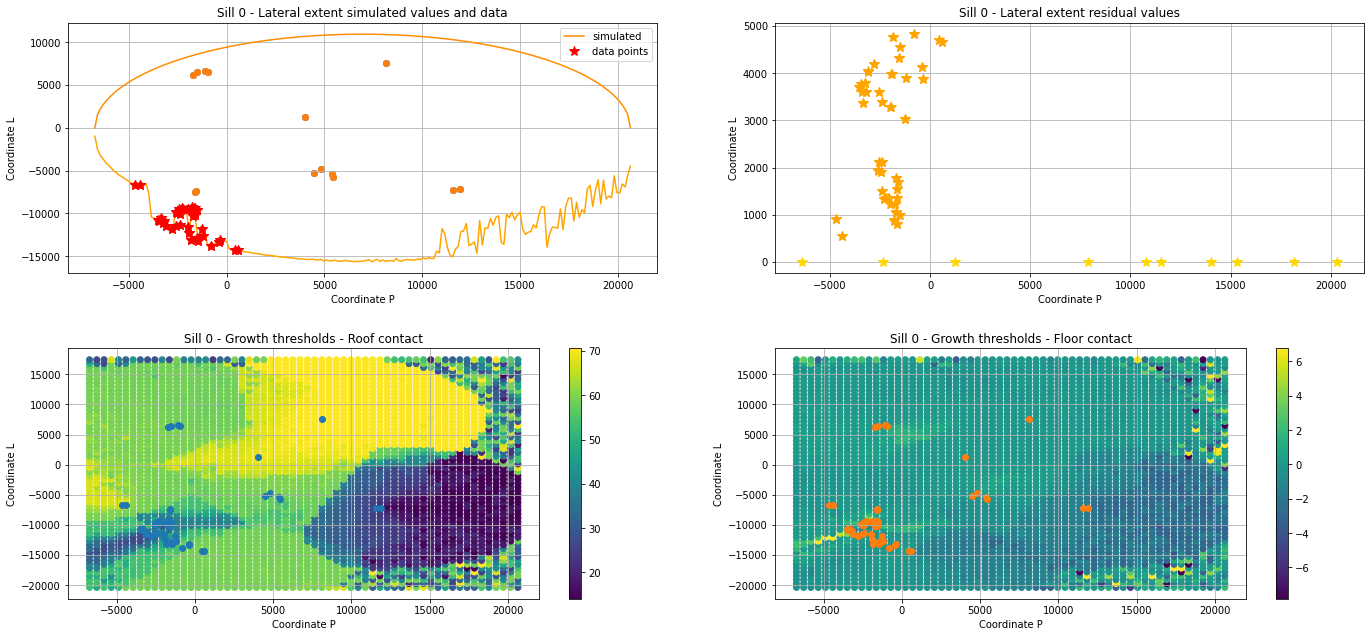

In [27]:
intrusion = Sill_a4
plt.subplot(221) # Lateral extent simulated values and data     
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'min_l_threshold'],"-",c='orange', markersize = 10)
plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'max_l_threshold'],"-", label = 'simulated', c='darkorange', markersize = 10)
# plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_minl'],"-", c='green', markersize = 10)
# plt.plot(intrusion.lateral_simulated_thresholds.loc[:,'coord1'],intrusion.lateral_simulated_thresholds.loc[:,'conceptual_maxl'],"-",  label = 'conceptual', c='green', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'coord2'],"*",  label = 'data points', c='red', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'coord2'],"*", c='red', markersize = 10)
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent simulated values and data')
plt.legend()
plt.grid(True)


plt.subplot(222) # Residual values  
plt.plot(intrusion.lateral_sgs_input_data[0].loc[:,'coord1'],intrusion.lateral_sgs_input_data[0].loc[:,'l_residual'],"*",  label = 'sides1', c='orange', markersize = 10)
plt.plot(intrusion.lateral_sgs_input_data[1].loc[:,'coord1'],intrusion.lateral_sgs_input_data[1].loc[:,'l_residual'],"*",  label = 'sides1', c='gold', markersize = 10)
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Lateral extent residual values')
plt.grid(True)

plt.subplot(223) # Vertical extent     
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_maximum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_maximum'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Roof contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplot(224)
vmin = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].min()
vmax = intrusion.growth_simulated_thresholds.loc[:,'g_minimum'].max()
plt.scatter(intrusion.growth_simulated_thresholds.loc[:,'coord1'],intrusion.growth_simulated_thresholds.loc[:,'coord2'], c=intrusion.growth_simulated_thresholds.loc[:,'g_minimum'])
plt.scatter(intrusion.vertical_sgs_input_data[0].loc[:,'coord1'],intrusion.vertical_sgs_input_data[0].loc[:,'coord2'])
plt.scatter(intrusion.vertical_sgs_input_data[1].loc[:,'coord1'],intrusion.vertical_sgs_input_data[1].loc[:,'coord2'])
plt.xlabel('Coordinate P'); plt.ylabel('Coordinate L'); plt.title('Sill 0 - Growth thresholds - Floor contact')
plt.grid(True)
plt.clim(vmin,vmax)
plt.colorbar()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3, top=2, wspace=0.2, hspace=0.3)
plt.show()

In [28]:
sill1_data = model.data[(model.data['feature_name']=='Sill_a1')].loc[:,['X','Y','Z']].to_numpy()
sill2_data = model.data[(model.data['feature_name']=='Sill_a2')].loc[:,['X','Y','Z']].to_numpy()
sill3_data = model.data[(model.data['feature_name']=='Sill_a3')].loc[:,['X','Y','Z']].to_numpy()
sill4_data = model.data[(model.data['feature_name']=='Sill_a4b')].loc[:,['X','Y','Z']].to_numpy()

In [29]:
conformable_feature.faults_enabled

True

In [30]:
# # visualization of 3D model od dolerites before post-intrusion faulting

viewer0 = LavaVuModelViewer(model, background='white')

# -- add stratigraphy
# viewer0.add_isosurface(topography['feature'], isovalue = 0, colour = 'black',  name = 'topo')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = -100, colour = 'darkblue',  name = 'Plo - Pln')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 0, colour = 'mediumblue',  name = 'Pln - Pff')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 100, colour = 'royalblue', name = 'Puo/Pud - Pum')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 200, colour = 'turquoise',  name = 'Pur - Pua')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 300, colour = 'lightgreen',  name = 'Pua - Rcq/Pch')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 400, colour = 'darkgreen',  name = 'Pch - Rqpc')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 500, colour = 'green',  name = 'Rqp/Rcq-Rqm')
viewer0.add_isosurface(conformable_feature['feature'], isovalue = 600, colour = 'yellowgreen',  name = 'Rqm-Rv')

# -- add pre-intrusion faults
viewer0.add_isosurface(pre_intrusion_fault_1, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_2, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_4, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_5, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_6, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_7, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_8, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_9, isovalue = 0, colour = 'red')
viewer0.add_isosurface(pre_intrusion_fault_10, isovalue = 0, colour = 'red')


# add intrusion
viewer0.add_isosurface(Sill_a1, isovalue = 0, colour = 'orange')
viewer0.add_isosurface(Sill_a2, isovalue = 0, colour = 'orange')
viewer0.add_isosurface(Sill_a3, isovalue = 0, colour = 'orange')
viewer0.add_isosurface(Sill_a4, isovalue = 0, colour = 'orange')

# viewer0.add_isosurface(Sill_a1.intrusion_frame[0], isovalue = 0, colour = 'red')

viewer0.add_points(model.rescale(sill1_data, inplace = False), name = 'sill1_data', pointsize = 4)
viewer0.add_points(model.rescale(sill2_data, inplace = False), name = 'sill2_data', pointsize = 4)
viewer0.add_points(model.rescale(sill3_data, inplace = False), name = 'sill3_data', pointsize = 4)
viewer0.add_points(model.rescale(sill4_data, inplace = False), name = 'sill4_data', pointsize = 4)

viewer0.ymin = 0.01
viewer0.ymax = 1
viewer0.interactive()

In [31]:
from datetime import datetime
datetime.now().isoformat(timespec='seconds')   

'2022-06-22T22:09:13'

In [32]:
conformable_feature.faults_enabled = True

uc1 = model.add_unconformity(Sill_a1,0)
model._add_unconformity_above(conformable_feature)
uc2 = model.add_unconformity(Sill_a2,0)
model._add_unconformity_above(conformable_feature)
uc3 = model.add_unconformity(Sill_a3,0)
model._add_unconformity_above(conformable_feature)
uc4 = model.add_unconformity(Sill_a4,0)
model._add_unconformity_above(conformable_feature)

model.dtm = elevation_from_z_inteprolation

In [33]:
# visualization of 3D model of dolerites post post-intrusion faulting

viewer = LavaVuModelViewer(model, background='white')

# viewer.add_isosurface(topography['feature'], isovalue = 0, colour = 'black',  name = 'topo')
# -- add stratigraphy
viewer.add_isosurface(conformable_feature['feature'], isovalue = -200, colour = 'darkblue',  name = 'base of Plo')
viewer.add_isosurface(conformable_feature['feature'], isovalue = -100, colour = 'darkblue',  name = 'Plo - Pln')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 0, colour = 'mediumblue',  name = 'Pln - Pff')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 100, colour = 'royalblue', name = 'Puo/Pud - Pum')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 200, colour = 'turquoise',  name = 'Pur - Pua')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 300, colour = 'lightgreen',  name = 'Pua - Rcq/Pch')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 400, colour = 'darkgreen',  name = 'Pch - Rqpc')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 500, colour = 'green',  name = 'Rqp/Rcq-Rqm')
viewer.add_isosurface(conformable_feature['feature'], isovalue = 600, colour = 'yellowgreen',  name = 'Rqm-Rv')

# -- add pre-intrusion faults
viewer.add_isosurface(pre_intrusion_fault_1, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_2, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_4, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_5, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_6, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_7, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_8, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_9, isovalue = 0, colour = 'red')
viewer.add_isosurface(pre_intrusion_fault_10, isovalue = 0, colour = 'red')

# -- add post-intrusion faults
viewer.add_isosurface(post_intrusion_fault_1, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_2, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3a, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3b, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3c, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3d, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3e, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_3f, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_4a, isovalue = 0, colour = 'blue')
viewer.add_isosurface(post_intrusion_fault_4b, isovalue = 0, colour = 'blue')


# add intrusion
viewer.add_isosurface(Sill_a1, isovalue = 0, colour = 'orange')
viewer.add_isosurface(Sill_a2, isovalue = 0, colour = 'orange')
viewer.add_isosurface(Sill_a3, isovalue = 0, colour = 'orange')
viewer.add_isosurface(Sill_a4, isovalue = 0, colour = 'orange')

# viewer.add_isosurface(Sill_a4.intrusion_frame[0], isovalue = 0, colour = 'red')

viewer.add_points(model.rescale(sill1_data, inplace = False), name = 'sill1_data', pointsize = 4)
viewer.add_points(model.rescale(sill2_data, inplace = False), name = 'sill2_data', pointsize = 4)
viewer.add_points(model.rescale(sill3_data, inplace = False), name = 'sill3_data', pointsize = 4)
viewer.add_points(model.rescale(sill4_data, inplace = False), name = 'sill4_data', pointsize = 4)

viewer.ymin = 0.01
viewer.ymax = 1
viewer.interactive()

In [34]:
from datetime import datetime
datetime.now().isoformat(timespec='seconds')   

'2022-06-23T03:03:58'